<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/06-18/0618_EIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 325 (delta 65), reused 14 (delta 8), pack-reused 197
Receiving objects: 100% (325/325), 13.87 MiB | 9.00 MiB/s, done.
Resolving deltas: 100% (141/141), done.


'/content'

# 24-05-23 Electrolysis of pure water

- Scan: linear dual
- Start: -3V
- Stop: 3V
(We would have been switching cathode and anode)
- No. of points: 100

No electrolysis occurred due to lack of EDL. However, solution turned yellow a tiny bit (shown below).


# Base Time
05/23/2024 09:57:03.867998320

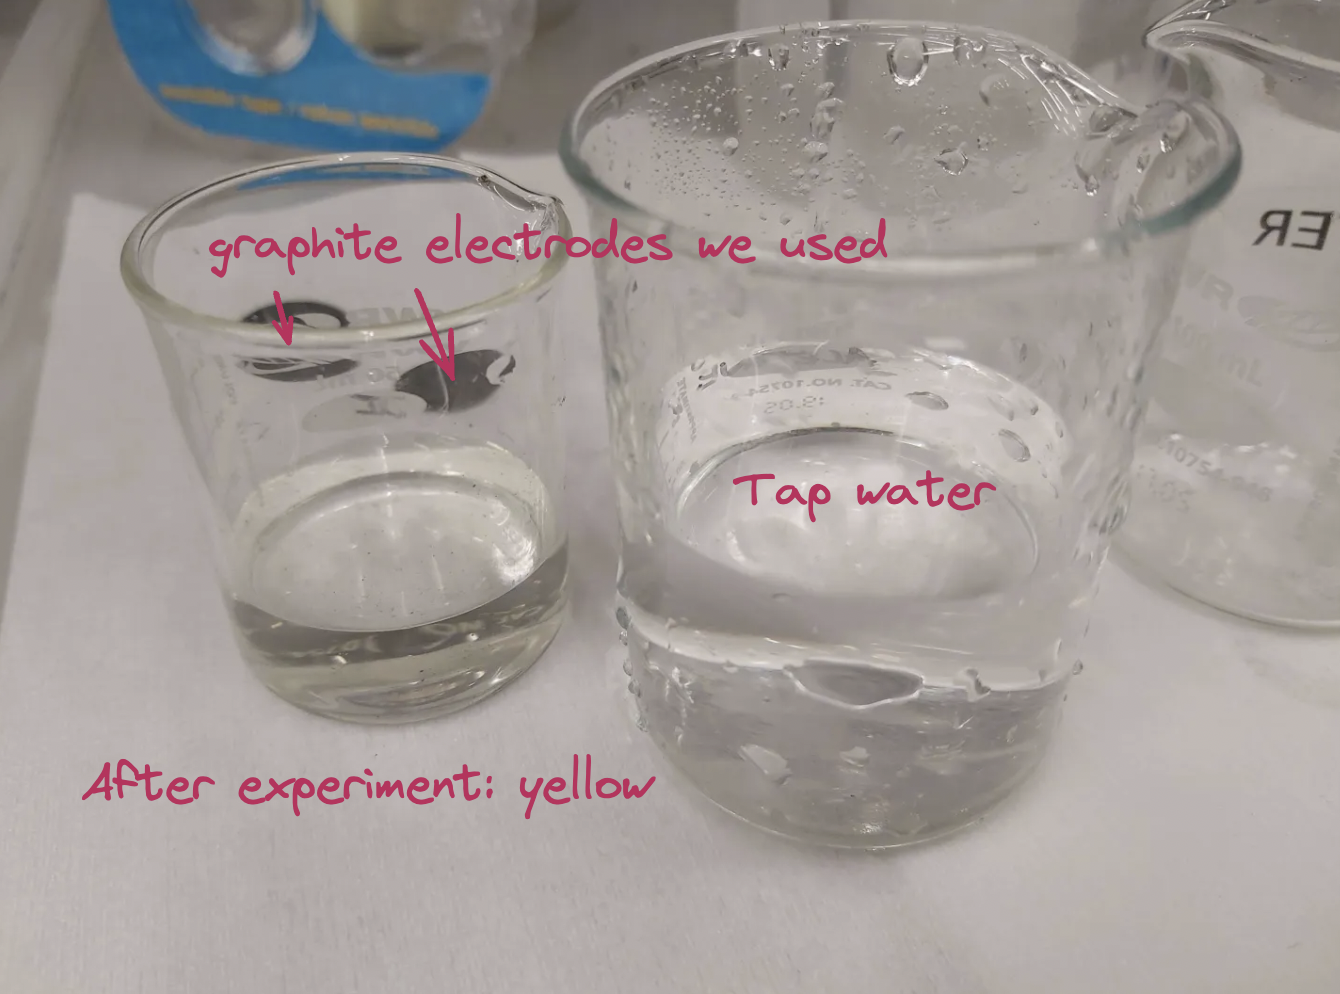

In [18]:
%cd gator/data/
%cd data
%cd 06-18
%pwd
%ls

[Errno 2] No such file or directory: 'gator/data/'
/content/gator/data
[Errno 2] No such file or directory: 'data'
/content/gator/data
/content/gator/data/06-18
0618_il1.z  0618_il2.z  0618_il3.z  0618_il4.z  eis.ipynb


In [27]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # Delete the first 8 lines
  lines = lines[132:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [28]:
prep_csv('0618_il1.z')
df = pd.read_csv('0618_il1.z')


EmptyDataError: No columns to parse from file

In [22]:
df = pd.read_csv('0618_il1.z')


ParserError: Error tokenizing data. C error: Expected 2 fields in line 139, saw 6


In [ ]:
# Time (s)
T = df['Relative Time']

# Current (mA)
I = df['Reading'] * 1e3

# Potential (mV)
V = df['Value'] * 1e3

Text(0.5, 0, 'Potential (s)')

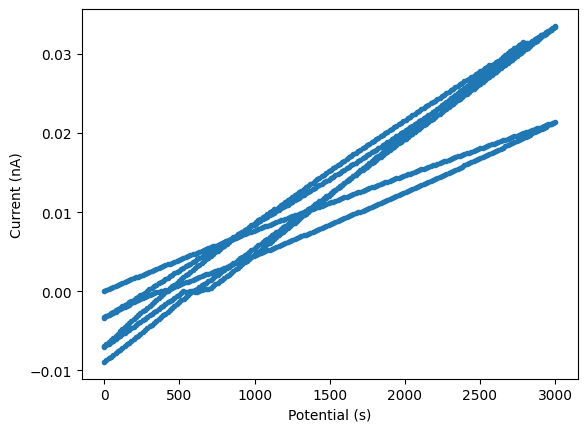

In [ ]:
cut1 = 0
cut2 = len(V)
plt.plot(V[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Potential (s)')